In [56]:
import matplotlib.pyplot as plt
import cv2
from day16_1 import imshow
import numpy as np

In [11]:
cat1=cv2.imread('cat.jpg')
cat2=cv2.imread('cat2_1.jpg')
cat3=cv2.imread('cat3.jpg')

dog1=cv2.imread('dog.jpg')
dog2=cv2.imread('dog2.png')
dog3=cv2.imread('dog3.png')

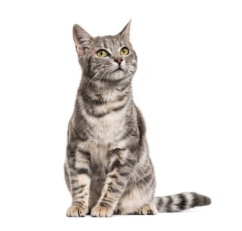

In [3]:
imshow(cat1)

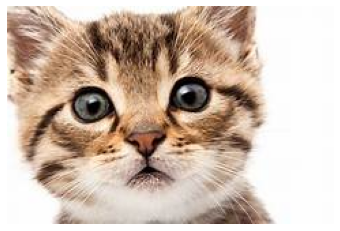

In [13]:
imshow(cat2)

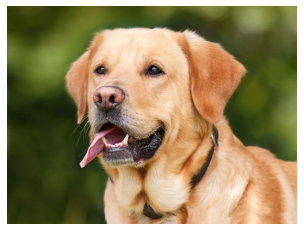

In [6]:
imshow(dog1)

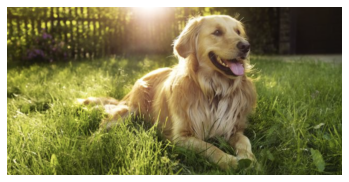

In [7]:
imshow(dog2)

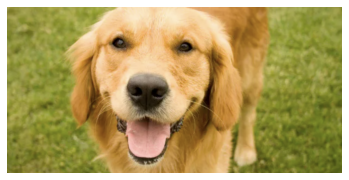

In [10]:
imshow(dog3)

In [14]:
sift_d=cv2.SIFT_create()
orb_d=cv2.ORB_create()
#surf_d=cv2.xfeatures2d.SURF()

In [16]:
def detectAndCompute(detector,images):
    kps=[]
    des=[]
    for img in images:

        keypoint,descripter=  detector.detectAndCompute(img,None)
        kps.append(keypoint)
        des.append(descripter)
    return kps,des
    
images=[cat1,cat2,cat3,dog1,dog2,dog3]

sift_kp ,sift_des =detectAndCompute(sift_d,images)
orb_kp ,orb_des =detectAndCompute(orb_d,images)

In [18]:
len(sift_kp)

6

In [19]:
sift_kp[0]

(< cv2.KeyPoint 000001AC9CEDDE40>,
 < cv2.KeyPoint 000001ACA1386540>,
 < cv2.KeyPoint 000001ACA0EDC2D0>,
 < cv2.KeyPoint 000001ACA0EDCDB0>,
 < cv2.KeyPoint 000001ACA0EDC210>,
 < cv2.KeyPoint 000001ACA0EDC390>,
 < cv2.KeyPoint 000001AC9D9AD660>,
 < cv2.KeyPoint 000001ACA13361E0>,
 < cv2.KeyPoint 000001ACA1311450>,
 < cv2.KeyPoint 000001ACA13114B0>,
 < cv2.KeyPoint 000001ACA1311480>,
 < cv2.KeyPoint 000001ACA1311330>,
 < cv2.KeyPoint 000001ACA1311360>,
 < cv2.KeyPoint 000001ACA1311AE0>,
 < cv2.KeyPoint 000001ACA1311A80>,
 < cv2.KeyPoint 000001ACA1311AB0>,
 < cv2.KeyPoint 000001ACA1311A50>,
 < cv2.KeyPoint 000001ACA1311A20>,
 < cv2.KeyPoint 000001ACA13119F0>,
 < cv2.KeyPoint 000001ACA0EB27E0>,
 < cv2.KeyPoint 000001ACA0EB26C0>,
 < cv2.KeyPoint 000001ACA0EB20F0>,
 < cv2.KeyPoint 000001ACA0EB2210>,
 < cv2.KeyPoint 000001ACA0EB2EA0>,
 < cv2.KeyPoint 000001ACA0EB2E70>,
 < cv2.KeyPoint 000001ACA0EB2D50>,
 < cv2.KeyPoint 000001ACA0EB2870>,
 < cv2.KeyPoint 000001ACA0EB27B0>,
 < cv2.KeyPoint 0000

In [20]:
len(sift_kp[0])

1349

In [21]:
for kp in sift_kp:
    print(len(kp))

1349
315
1734
555
5799
626


In [22]:
for kp in orb_kp:
    print(len(kp))

500
374
500
500
500
500


In [23]:
def drawKeypoint(img,kp):
    img_kp=cv2.drawKeypoints(
          img ,kp ,0,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    imshow(img_kp)
    plt.show()

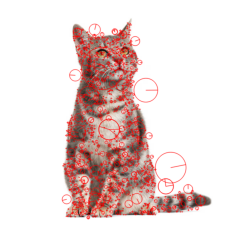

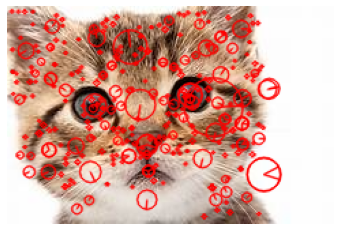

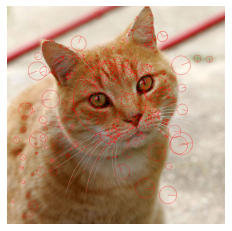

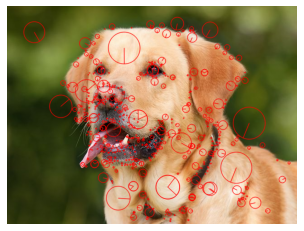

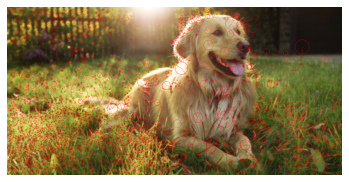

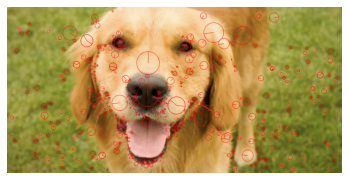

In [24]:
for img,kp in zip(images ,sift_kp):
    drawKeypoint(img,kp)

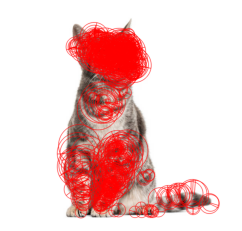

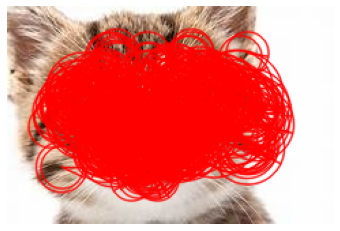

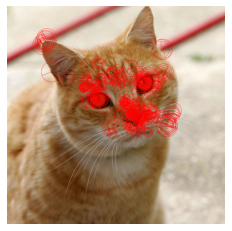

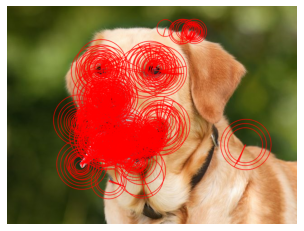

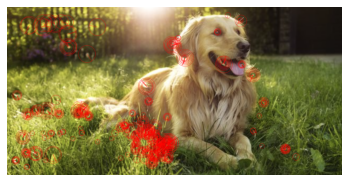

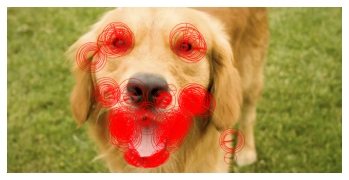

In [25]:
for img,kp in zip(images ,orb_kp):
    drawKeypoint(img,kp)

In [31]:

matcher = cv2.BFMatcher()

In [52]:
# def compare_des(query ,descs):
#     results=[]
#     for des in descs:
#         matches =matcher.knnMatch(query,des ,k=2)
#         count=0
#         tol=0.05
#         for m1,m2 in matches:
#             gap=abs(m1.distance-m2.distance)
#             if gap <(tol *m1.distance):
#                 count+=1
#         th =0.7
#         if count/len(matches)   > th:
#             results.append(True)
#         else:
#             results.append(False)   

#     return results


In [59]:
def compare_des(query ,descs):
    results=[]
    for des in descs:
        matches =matcher.match(query,des )
        matches =[val.distance for val in matches]
        mean =np.mean(matches)
        results.append(mean)
    return results


In [60]:
sift_res=compare_des(sift_des[-1] , sift_des[:-1])
orb_res=compare_des(orb_des[-1] , orb_des[:-1])

In [61]:
sift_res

[305.929792763707,
 339.68072229452406,
 301.50694443090276,
 320.58561912512243,
 286.18682017950965]

In [62]:
orb_res

[337.24139865112306,
 343.9714894714356,
 337.33105642700195,
 330.9215179595947,
 356.8679698181152]

In [63]:
labels=['cat','cat','cat','Dog','Dog']

In [68]:
prediction=labels[sift_res.index(min(sift_res))]  #we are go through min approch approch
print(prediction)

Dog


In [66]:
prediction=labels[orb_res.index(min(orb_res))]
print(prediction)

Dog


In [71]:
#for cat image display

In [78]:
sift_res=compare_des(sift_des[1] , sift_des[1:])
#orb_res=compare_des(sift_des[0:1] , sift_des[1:])

In [75]:
sift_res

[337.5574600977576,
 307.53213101691716,
 323.0857515667349,
 292.4900495162975,
 320.43778129221334]

In [76]:
labels=['cat','cat','Dog','Dog','Dog']

In [79]:
prediction=labels[sift_res.index(min(sift_res))]  #we are go through min approch approch
print(prediction)

cat
